In [1]:
from rdflib import Graph
import re
import pandas as pd
from rdflib import Graph, URIRef, Namespace, Literal
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/var/folders/6f/k2t20zbs4db5khp6mgdq_06m0000gn/T/ipykernel_8176/2914453593.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [178]:
#baseline_df = pd.read_csv('/Users/yamamotobikutorueiichi/codes/gollumn - subdataset/ma-dbpedia-original-paris/9_eqv_full.tsv', sep='\t', names=['e1', 'e2', 'sim'])
baseline_df = pd.read_csv('/Users/yamamotobikutorueiichi/codes/custom_paris/both func and func inv method/early_stop/mcu-mdb/llama_added.csv')


In [179]:
baseline_df

,Unnamed: 0.1,e1,e2,sim,Unnamed: 0
0,0,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/class/actor,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Actor,0.950000,NaN
1,1,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/class/armor,http://dbkwik.webdatacommons.org/marvel.wikia.com/class/main,0.821714,NaN
2,2,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/class/box,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Box,0.950000,NaN
3,3,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/class/character,http://dbkwik.webdatacommons.org/marvel.wikia.com/class/md,0.824619,NaN
4,4,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/class/clear,http://dbkwik.webdatacommons.org/marvel.wikia.com/class/clear,0.949991,NaN
...,...,...,...,...,...
10424,1977,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Zürich,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Zurich,0.950000,1977.0
10425,1978,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Álex_García_López,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Alex_Garcia_Lopez,0.950000,1978.0
10426,1979,http://www.w3.org/2002/07/owl#Class,http://www.w3.org/2002/07/owl#Class,0.500000,1979.0
10427,1980,http://www.w3.org/2002/07/owl#Thing,http://www.w3.org/2002/07/owl#Thing,0.500000,1980.0


In [180]:
ftm_df = pd.read_csv('/Users/yamamotobikutorueiichi/codes/custom_paris/both func and func inv method/early_stop/mcu-mdb/entity_sim_1.csv')

In [181]:
def get_top_n(dictionary, n, reverse=True):
    sorted_elements = sorted(dictionary.items(), key=lambda x: x[1], reverse=reverse)
    if len(sorted_elements) < n:
        return sorted_elements
    n_sim = sorted_elements[n-1][1]
    
    top_n_list = list()
    for element in sorted_elements:
        e2, sim = element
        if (reverse and sim < n_sim) or (not reverse and sim > n_sim):
            return top_n_list
            
        top_n_list.append(element)
    return top_n_list

In [182]:
grouped_df = ftm_df.groupby('e1')

In [183]:
elem_dict = dict()
for e1, group_indices in tqdm(grouped_df.groups.items()):
    # Access the group corresponding to 'e1'
    e1_group = ftm_df.iloc[group_indices]
    e1_dict = dict(zip(e1_group['e2'], e1_group['sim']))
    elem_dict[e1] = e1_dict

  0%|          | 0/10463 [00:00<?, ?it/s]

In [184]:
added_list = list()
for e1, e2_pair in tqdm(elem_dict.items()):
    if e1 not in ftm_df['e1'].values:
        added_list.append({
            'e1': e1,
            'chosen_e2': e2_pair[0][0]
        })

  0%|          | 0/10463 [00:00<?, ?it/s]

In [186]:
len(added_list)

0

In [187]:
match_df = pd.read_csv('/Users/yamamotobikutorueiichi/codes/custom_paris/mcu-mdb-gold.csv')

In [188]:
match_df

,Unnamed: 0,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,e1,e2,http://knowledgeweb.semanticweb.org/heterogeneity/alignmentrelation,sim
0,0,http://knowledgeweb.semanticweb.org/heterogeneity/alignmentCell,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/A%27Lars,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/A%27Lars,=,1.0
1,1,http://knowledgeweb.semanticweb.org/heterogeneity/alignmentCell,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/A%27askavariians,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/A%27askvarii,=,1.0
2,2,http://knowledgeweb.semanticweb.org/heterogeneity/alignmentCell,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/A.I.M.,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/A.I.M.,=,1.0
3,3,http://knowledgeweb.semanticweb.org/heterogeneity/alignmentCell,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Aakons,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Aakon,=,1.0
4,4,http://knowledgeweb.semanticweb.org/heterogeneity/alignmentCell,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Prowler,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Aaron_Davis,=,1.0
...,...,...,...,...,...,...
1662,1662,http://knowledgeweb.semanticweb.org/heterogeneity/alignmentCell,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/property/name,http://dbkwik.webdatacommons.org/marvel.wikia.com/property/name,=,1.0
1663,1663,http://knowledgeweb.semanticweb.org/heterogeneity/alignmentCell,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/property/gender,http://dbkwik.webdatacommons.org/marvel.wikia.com/property/gender,=,1.0
1664,1664,http://knowledgeweb.semanticweb.org/heterogeneity/alignmentCell,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/property/title,http://dbkwik.webdatacommons.org/marvel.wikia.com/property/title,=,1.0
1665,1665,http://knowledgeweb.semanticweb.org/heterogeneity/alignmentCell,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/property/next,http://dbkwik.webdatacommons.org/marvel.wikia.com/property/next,=,1.0


In [189]:
match_df['e1'] = match_df['e1'].str.replace('starwars.wikia.com', 'starwars.')

In [190]:
match_df = match_df[match_df['e1'].str.contains('/resource/') & match_df['e2'].str.contains('/resource/')]

In [191]:
match_df = match_df[['e1', 'e2']]

In [192]:
result_df = pd.merge(baseline_df, match_df, left_on=['e1', 'e2'], right_on=['e1', 'e2'])

In [193]:
result_df

,Unnamed: 0.1,e1,e2,sim,Unnamed: 0
0,129,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/A.I.M.,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/A.I.M.,0.950000,NaN
1,134,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/A.R.M.O.R.,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Alternate_Reality_Monitoring_and_Operational_Response_Agency_(Earth-616),0.950000,NaN
2,176,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Aakons,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Aakon,0.840365,NaN
3,213,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/AccuTech,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/AccuTech,0.950000,NaN
4,242,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Adina_Johnson,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Mrs._Johnson,0.762661,NaN
...,...,...,...,...,...
1007,1971,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Zen-Whoberi,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Zen-Whoberi,0.950000,1971.0
1008,1974,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Zhou_Cheng,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Zhou_Cheng,0.950000,1974.0
1009,1975,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Zodiac_Key,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Zodiac_Key,0.950000,1975.0
1010,1976,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Zuri,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Zuri,0.950000,1976.0


In [194]:
baseline_df['chosen_e2_value'] = baseline_df['e2']

In [195]:
hit = 0
for index, row in baseline_df.iterrows():
    e1 = row['e1']
    e2 = row['chosen_e2_value']
    
    if ((result_df['e1'] == e1) & (result_df['e2'] == e2)).any():
        baseline_df.at[index, 'Predicted'] = True
        hit += 0
    else:
        baseline_df.at[index, 'Predicted'] = False

In [196]:
baseline_df

,Unnamed: 0.1,e1,e2,sim,Unnamed: 0,chosen_e2_value,Predicted
0,0,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/class/actor,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Actor,0.950000,NaN,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Actor,False
1,1,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/class/armor,http://dbkwik.webdatacommons.org/marvel.wikia.com/class/main,0.821714,NaN,http://dbkwik.webdatacommons.org/marvel.wikia.com/class/main,False
2,2,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/class/box,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Box,0.950000,NaN,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Box,False
3,3,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/class/character,http://dbkwik.webdatacommons.org/marvel.wikia.com/class/md,0.824619,NaN,http://dbkwik.webdatacommons.org/marvel.wikia.com/class/md,False
4,4,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/class/clear,http://dbkwik.webdatacommons.org/marvel.wikia.com/class/clear,0.949991,NaN,http://dbkwik.webdatacommons.org/marvel.wikia.com/class/clear,False
...,...,...,...,...,...,...,...
10424,1977,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Zürich,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Zurich,0.950000,1977.0,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Zurich,True
10425,1978,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Álex_García_López,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Alex_Garcia_Lopez,0.950000,1978.0,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Alex_Garcia_Lopez,False
10426,1979,http://www.w3.org/2002/07/owl#Class,http://www.w3.org/2002/07/owl#Class,0.500000,1979.0,http://www.w3.org/2002/07/owl#Class,False
10427,1980,http://www.w3.org/2002/07/owl#Thing,http://www.w3.org/2002/07/owl#Thing,0.500000,1980.0,http://www.w3.org/2002/07/owl#Thing,False


In [197]:
for index, row in baseline_df.iterrows():
    e1 = row['e1']
    e2 = row['chosen_e2_value']
    
    if ((match_df['e1'] == e1) | (match_df['e2'] == e2)).any():
        baseline_df.at[index, 'Analyzed'] = True
    else:
        baseline_df.at[index, 'Analyzed'] = False

In [198]:
pd.set_option('display.max_colwidth', None)


In [199]:
analyzed_baseline_df = baseline_df[baseline_df['Analyzed'] == True]

In [200]:
grouped_df = baseline_df.groupby('e1')

In [201]:
len(analyzed_baseline_df)

3133

In [202]:
len(analyzed_baseline_df[analyzed_baseline_df['Predicted'] == True])

1012

In [203]:
len(analyzed_baseline_df[analyzed_baseline_df['Predicted'] == True])

1012

In [204]:
len(match_df)

1654

In [205]:
len(analyzed_baseline_df[analyzed_baseline_df['Predicted'] == True]) / len(match_df)

0.6118500604594922

In [206]:
len(analyzed_baseline_df[analyzed_baseline_df['Predicted'] == True])

1012

In [207]:
correct_total = len(analyzed_baseline_df[analyzed_baseline_df['Predicted'] == True])

In [208]:
analyzed_total = len(baseline_df)

In [209]:
gs_total = len(match_df)

In [210]:
precision = correct_total / analyzed_total

In [211]:
recall = correct_total / gs_total

In [212]:
precision

0.09703710806405216

In [213]:
recall

0.6118500604594922

In [214]:
f_measure = 2 * (precision * recall) / (precision + recall)
f_measure

0.16750806918811553

In [215]:
def precision_score(df, threshold):
    threshold_df = df
    
    matches = len(threshold_df)
    
    if matches == 0:
        return 0
    
    correct_matches_df = pd.merge(threshold_df, match_df, left_on=['e1', 'e2'], right_on=['e1', 'e2'])
    
    correct_matches = len(threshold_df[threshold_df['Predicted'] == True])
    
    return correct_matches / matches 

In [216]:
def recall_score(df, total_correct, threshold):
    threshold_df = df
    
    correct_matches = len(threshold_df[threshold_df['Predicted'] == True])
    
    return correct_matches / total_correct

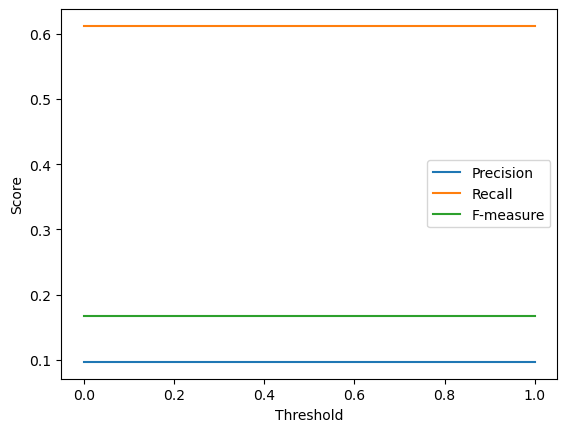

In [217]:
thresholds = np.arange(0, 1.01, 0.01)

total_correct = len(match_df)

precisions = [precision_score(baseline_df, t) for t in thresholds]
recalls = [recall_score(baseline_df, total_correct, t) for t in thresholds]
f_measures = []
for precision, recall in zip(precisions, recalls):
    f_measure = 0
    if precision + recall > 0:
        f_measure = 2 * (precision * recall) / (precision + recall)
    f_measures.append(f_measure)
    
# Plot precision, recall, and F-measure
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f_measures, label='F-measure')

# Add labels and legend
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()

# Display the graph
plt.show()

In [218]:
max_index = f_measures.index(max(f_measures))

# Get the corresponding precision and recall
max_f = f_measures[max_index]
related_precision = precisions[max_index]
related_recall = recalls[max_index]
related_threshold = thresholds[max_index]

print("Max F-measure:", max_f)
print("Related Precision:", related_precision)
print("Related Recall:", related_recall)
print("Related threshold:", related_threshold)

Max F-measure: 0.16750806918811553
Related Precision: 0.09703710806405216
Related Recall: 0.6118500604594922
Related threshold: 0.0
